# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import datetime 

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

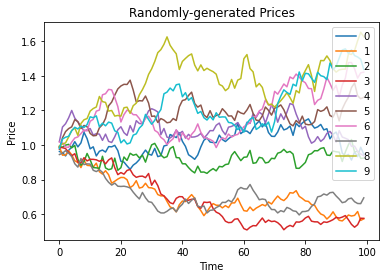

In [172]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

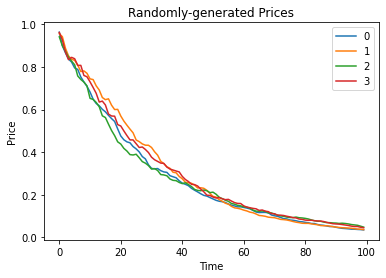

In [173]:
ra = pd.DataFrame(np.random.normal(0.97, 0.02, (100, 4)))
pr = ra.cumprod()
pr.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [174]:
s = pd.Series([1, 2, np.nan, 4, 5])
print (s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [175]:
s2 = pd.Series([1, 3, np.nan, 6])
print (s2)

0    1.0
1    3.0
2    NaN
3    6.0
dtype: float64


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [176]:
print (s.name)

None


In [177]:
print (s2.name)

None


This name can be directly modified with no repercussions.

In [178]:
s.name = "Toy Series"
print (s.name)

Toy Series


In [179]:
s2.name = "Prueba"
print (s2.name)

Prueba


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [180]:
print (s.index)

RangeIndex(start=0, stop=5, step=1)


In [181]:
print (s2.index)

RangeIndex(start=0, stop=4, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [182]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print (new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [183]:
A = pd.date_range("2017-01-01", periods=len(s2), freq="A")
print (A)

DatetimeIndex(['2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31'], dtype='datetime64[ns]', freq='A-DEC')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [184]:
s.index = new_index
print (s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [185]:
s2.index = A
print (s2.index)

DatetimeIndex(['2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31'], dtype='datetime64[ns]', freq='A-DEC')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [186]:
print ("First element of the series: ", s.iloc[0])
print ("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


In [187]:
print ("Second element of the series: ", s2.iloc[1])
print ("Last element of the series: ", s2.iloc[len(s2)-1])

Second element of the series:  3.0
Last element of the series:  6.0


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [188]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

In [189]:
s2.iloc[:1]

2017-12-31    1.0
Freq: A-DEC, Name: Prueba, dtype: float64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [190]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

In [191]:
start = 0
end = len(s2) - 1
step = 1

s2.iloc[start:end:step]

2017-12-31    1.0
2018-12-31    3.0
2019-12-31    NaN
Freq: A-DEC, Name: Prueba, dtype: float64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [192]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

In [193]:
s2.iloc[::-1]

2020-12-31    6.0
2019-12-31    NaN
2018-12-31    3.0
2017-12-31    1.0
Freq: -1A-DEC, Name: Prueba, dtype: float64

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [194]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

In [195]:
s2.iloc[-1:-3:-1]

2020-12-31    6.0
2019-12-31    NaN
Freq: -1A-DEC, Name: Prueba, dtype: float64

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [196]:
s.loc['2016-01-01']

1.0

In [197]:
s2.loc['2020-12-31']

6.0

Or even for a range of dates!

In [198]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

In [199]:
s2.loc['2017-12-31':'2020-12-31']

2017-12-31    1.0
2018-12-31    3.0
2019-12-31    NaN
2020-12-31    6.0
Freq: A-DEC, Name: Prueba, dtype: float64

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [200]:
print (s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


In [201]:
print (s2 < 4)

2017-12-31     True
2018-12-31     True
2019-12-31    False
2020-12-31    False
Freq: A-DEC, Name: Prueba, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [202]:
print (s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


In [203]:
print (s2.loc[s2 > 4])

2020-12-31    6.0
Freq: A-DEC, Name: Prueba, dtype: float64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [204]:
print (s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


In [205]:
print (s2.loc[(s2 >= 3) & (s2 < 6)])

2018-12-31    3.0
Freq: A-DEC, Name: Prueba, dtype: float64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [206]:
pip install pandas-datareader

In [207]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
pric = pdr.get_data_yahoo(symbol, start, end)
prices = pric['Adj Close']

In [208]:
symbol2 = "TWTR"
start2 = "2016-01-01"
end2 = "2020-01-01"
pr2 = pdr.get_data_yahoo(symbol2, start2, end2)
prices2 = pr2['Adj Close']

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [209]:
print ("\n", type(prices))
prices.head(5) 


 <class 'pandas.core.series.Series'>


Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: Adj Close, dtype: float64

In [210]:
print ("\n", type(prices2))
prices2.head(4)


 <class 'pandas.core.series.Series'>


Date
2016-01-04    22.559999
2016-01-05    21.920000
2016-01-06    21.389999
2016-01-07    20.260000
Name: Adj Close, dtype: float64

As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [211]:
print ('Old name: ', prices.name)
prices.name = symbol
print ('New name: ', prices.name)

Old name:  Adj Close
New name:  CMG


In [212]:
print ('Old name: ', prices2.name)
prices2.name = symbol2
print ('New name: ', prices2.name)

Old name:  Adj Close
New name:  TWTR


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [213]:
print (prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


In [214]:
print (prices2.index)

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [215]:
monthly_prices = prices.resample('M').mean()
monthly_prices.head(10)

Date
2012-01-31    354.829002
2012-02-29    379.535503
2012-03-31    407.002272
2012-04-30    422.798997
2012-05-31    405.805456
2012-06-30    403.033335
2012-07-31    353.880474
2012-08-31    294.535219
2012-09-30    326.513160
2012-10-31    276.573333
Freq: M, Name: CMG, dtype: float64

In [216]:
mp = prices2.resample('M').mean()
print (mp)

Date
2016-01-31    18.675789
2016-02-29    16.823000
2016-03-31    17.159091
2016-04-30    16.757143
2016-05-31    14.390000
2016-06-30    15.698636
2016-07-31    17.739000
2016-08-31    18.690435
2016-09-30    19.983810
2016-10-31    18.647619
2016-11-30    18.383809
2016-12-31    17.984762
2017-01-31    16.980000
2017-02-28    16.732105
2017-03-31    15.173913
2017-04-30    14.793158
2017-05-31    18.413182
2017-06-30    17.596364
2017-07-31    18.814000
2017-08-31    16.345652
2017-09-30    17.383500
2017-10-31    18.383182
2017-11-30    20.621428
2017-12-31    22.826500
2018-01-31    24.211429
2018-02-28    30.693158
2018-03-31    33.168095
2018-04-30    29.604286
2018-05-31    32.640909
2018-06-30    43.154762
2018-07-31    42.441428
2018-08-31    33.386521
2018-09-30    30.058421
2018-10-31    29.496957
2018-11-30    32.929524
2018-12-31    31.871579
2019-01-31    31.923810
2019-02-28    31.583158
2019-03-31    31.567619
2019-04-30    35.845238
2019-05-31    38.065909
2019-06-30 

The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [217]:
monthly_prices_med = prices.resample('M').median()
monthly_prices_med.head(10)

Date
2012-01-31    355.505005
2012-02-29    378.195007
2012-03-31    408.994995
2012-04-30    420.835007
2012-05-31    405.240005
2012-06-30    402.450012
2012-07-31    380.470001
2012-08-31    295.390015
2012-09-30    332.809998
2012-10-31    286.559998
Freq: M, Name: CMG, dtype: float64

In [218]:
mpm = prices2.resample('M').median()
print(mpm)

Date
2016-01-31    17.940001
2016-02-29    17.184999
2016-03-31    16.850000
2016-04-30    17.090000
2016-05-31    14.340000
2016-06-30    15.855000
2016-07-31    18.020000
2016-08-31    18.549999
2016-09-30    19.110001
2016-10-31    17.790001
2016-11-30    18.410000
2016-12-31    18.230000
2017-01-31    16.950000
2017-02-28    16.420000
2017-03-31    15.120000
2017-04-30    14.540000
2017-05-31    18.380000
2017-06-30    17.620000
2017-07-31    19.285000
2017-08-31    16.180000
2017-09-30    17.515000
2017-10-31    17.880000
2017-11-30    20.360001
2017-12-31    22.405000
2018-01-31    24.320000
2018-02-28    31.860001
2018-03-31    34.110001
2018-04-30    29.389999
2018-05-31    32.760000
2018-06-30    44.070000
2018-07-31    43.869999
2018-08-31    32.830002
2018-09-30    29.750000
2018-10-31    28.830000
2018-11-30    32.820000
2018-12-31    32.930000
2019-01-31    32.259998
2019-02-28    31.120001
2019-03-31    31.219999
2019-04-30    34.709999
2019-05-31    37.700001
2019-06-30 

We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [219]:
first_of_month_prices = prices.resample('M').first()
first_of_month_prices.head(10)

Date
2012-01-31    341.269989
2012-02-29    370.410004
2012-03-31    394.100006
2012-04-30    418.399994
2012-05-31    419.890015
2012-06-30    397.140015
2012-07-31    383.459991
2012-08-31    280.670013
2012-09-30    285.989990
2012-10-31    316.130005
Freq: M, Name: CMG, dtype: float64

In [220]:
pf = prices2.resample('M').first()
print (pf)

Date
2016-01-31    22.559999
2016-02-29    17.910000
2016-03-31    17.850000
2016-04-30    15.980000
2016-05-31    14.400000
2016-06-30    15.020000
2016-07-31    17.280001
2016-08-31    16.639999
2016-09-30    19.500000
2016-10-31    24.000000
2016-11-30    17.490000
2016-12-31    18.030001
2017-01-31    16.440001
2017-02-28    17.240000
2017-03-31    15.790000
2017-04-30    14.840000
2017-05-31    17.540001
2017-06-30    18.530001
2017-07-31    17.650000
2017-08-31    16.209999
2017-09-30    16.860001
2017-10-31    17.090000
2017-11-30    20.610001
2017-12-31    20.709999
2018-01-31    24.510000
2018-02-28    27.139999
2018-03-31    32.240002
2018-04-30    28.040001
2018-05-31    30.299999
2018-06-30    36.650002
2018-07-31    44.980000
2018-08-31    31.910000
2018-09-30    34.840000
2018-10-31    28.309999
2018-11-30    34.619999
2018-12-31    33.660000
2019-01-31    28.809999
2019-02-28    33.189999
2019-03-31    30.620001
2019-04-30    33.439999
2019-05-31    39.290001
2019-06-30 

We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [221]:
eastern_prices = prices.tz_localize('US/Eastern')
eastern_prices.head(10)

Date
2012-01-03 00:00:00-05:00    341.269989
2012-01-04 00:00:00-05:00    348.750000
2012-01-05 00:00:00-05:00    350.480011
2012-01-06 00:00:00-05:00    348.950012
2012-01-09 00:00:00-05:00    339.739990
2012-01-10 00:00:00-05:00    341.119995
2012-01-11 00:00:00-05:00    347.600006
2012-01-12 00:00:00-05:00    347.619995
2012-01-13 00:00:00-05:00    354.619995
2012-01-17 00:00:00-05:00    353.380005
Name: CMG, dtype: float64

In [222]:
pe = prices2.tz_localize('US/Eastern')
print(pe)

Date
2016-01-04 00:00:00-05:00    22.559999
2016-01-05 00:00:00-05:00    21.920000
2016-01-06 00:00:00-05:00    21.389999
2016-01-07 00:00:00-05:00    20.260000
2016-01-08 00:00:00-05:00    19.980000
                               ...    
2019-12-24 00:00:00-05:00    32.500000
2019-12-26 00:00:00-05:00    32.630001
2019-12-27 00:00:00-05:00    32.549999
2019-12-30 00:00:00-05:00    32.029999
2019-12-31 00:00:00-05:00    32.049999
Name: TWTR, Length: 1006, dtype: float64


In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [223]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print (calendar_dates)

DatetimeIndex(['2012-01-01 00:00:00+00:00', '2012-01-02 00:00:00+00:00',
               '2012-01-03 00:00:00+00:00', '2012-01-04 00:00:00+00:00',
               '2012-01-05 00:00:00+00:00', '2012-01-06 00:00:00+00:00',
               '2012-01-07 00:00:00+00:00', '2012-01-08 00:00:00+00:00',
               '2012-01-09 00:00:00+00:00', '2012-01-10 00:00:00+00:00',
               ...
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-25 00:00:00+00:00', '2015-12-26 00:00:00+00:00',
               '2015-12-27 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-29 00:00:00+00:00', '2015-12-30 00:00:00+00:00',
               '2015-12-31 00:00:00+00:00', '2016-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


In [224]:
dates = pd.date_range(start= start2, end= end2, freq='D', tz='UTC')
print (dates)

DatetimeIndex(['2016-01-01 00:00:00+00:00', '2016-01-02 00:00:00+00:00',
               '2016-01-03 00:00:00+00:00', '2016-01-04 00:00:00+00:00',
               '2016-01-05 00:00:00+00:00', '2016-01-06 00:00:00+00:00',
               '2016-01-07 00:00:00+00:00', '2016-01-08 00:00:00+00:00',
               '2016-01-09 00:00:00+00:00', '2016-01-10 00:00:00+00:00',
               ...
               '2019-12-23 00:00:00+00:00', '2019-12-24 00:00:00+00:00',
               '2019-12-25 00:00:00+00:00', '2019-12-26 00:00:00+00:00',
               '2019-12-27 00:00:00+00:00', '2019-12-28 00:00:00+00:00',
               '2019-12-29 00:00:00+00:00', '2019-12-30 00:00:00+00:00',
               '2019-12-31 00:00:00+00:00', '2020-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [225]:
calendar_prices = prices.tz_localize('US/Eastern').reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-01 00:00:00+00:00           NaN
2012-01-02 00:00:00+00:00           NaN
2012-01-03 00:00:00+00:00           NaN
2012-01-04 00:00:00+00:00    341.269989
2012-01-05 00:00:00+00:00    348.750000
2012-01-06 00:00:00+00:00    350.480011
2012-01-07 00:00:00+00:00    348.950012
2012-01-08 00:00:00+00:00    348.950012
2012-01-09 00:00:00+00:00    348.950012
2012-01-10 00:00:00+00:00    339.739990
2012-01-11 00:00:00+00:00    341.119995
2012-01-12 00:00:00+00:00    347.600006
2012-01-13 00:00:00+00:00    347.619995
2012-01-14 00:00:00+00:00    354.619995
2012-01-15 00:00:00+00:00    354.619995
Freq: D, Name: CMG, dtype: float64

In [226]:
cp = prices2.tz_localize('US/Eastern').reindex(dates, method='ffill')
print (cp)

2016-01-01 00:00:00+00:00          NaN
2016-01-02 00:00:00+00:00          NaN
2016-01-03 00:00:00+00:00          NaN
2016-01-04 00:00:00+00:00          NaN
2016-01-05 00:00:00+00:00    22.559999
                               ...    
2019-12-28 00:00:00+00:00    32.549999
2019-12-29 00:00:00+00:00    32.549999
2019-12-30 00:00:00+00:00    32.549999
2019-12-31 00:00:00+00:00    32.029999
2020-01-01 00:00:00+00:00    32.049999
Freq: D, Name: TWTR, Length: 1462, dtype: float64


You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [227]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2012-01-01 00:00:00+00:00    501.082728
2012-01-02 00:00:00+00:00    501.082728
2012-01-03 00:00:00+00:00    501.082728
2012-01-04 00:00:00+00:00    341.269989
2012-01-05 00:00:00+00:00    348.750000
2012-01-06 00:00:00+00:00    350.480011
2012-01-07 00:00:00+00:00    348.950012
2012-01-08 00:00:00+00:00    348.950012
2012-01-09 00:00:00+00:00    348.950012
2012-01-10 00:00:00+00:00    339.739990
Freq: D, Name: CMG, dtype: float64

In [228]:
meanp = cp.fillna(cp.mean())
meanp.head(10)

2016-01-01 00:00:00+00:00    25.937366
2016-01-02 00:00:00+00:00    25.937366
2016-01-03 00:00:00+00:00    25.937366
2016-01-04 00:00:00+00:00    25.937366
2016-01-05 00:00:00+00:00    22.559999
2016-01-06 00:00:00+00:00    21.920000
2016-01-07 00:00:00+00:00    21.389999
2016-01-08 00:00:00+00:00    20.260000
2016-01-09 00:00:00+00:00    19.980000
2016-01-10 00:00:00+00:00    19.980000
Freq: D, Name: TWTR, dtype: float64

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [229]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01 00:00:00+00:00    341.269989
2012-01-02 00:00:00+00:00    341.269989
2012-01-03 00:00:00+00:00    341.269989
2012-01-04 00:00:00+00:00    341.269989
2012-01-05 00:00:00+00:00    348.750000
2012-01-06 00:00:00+00:00    350.480011
2012-01-07 00:00:00+00:00    348.950012
2012-01-08 00:00:00+00:00    348.950012
2012-01-09 00:00:00+00:00    348.950012
2012-01-10 00:00:00+00:00    339.739990
Freq: D, Name: CMG, dtype: float64

In [230]:
bp = cp.fillna(method='bfill')
bp.head(10)

2016-01-01 00:00:00+00:00    22.559999
2016-01-02 00:00:00+00:00    22.559999
2016-01-03 00:00:00+00:00    22.559999
2016-01-04 00:00:00+00:00    22.559999
2016-01-05 00:00:00+00:00    22.559999
2016-01-06 00:00:00+00:00    21.920000
2016-01-07 00:00:00+00:00    21.389999
2016-01-08 00:00:00+00:00    20.260000
2016-01-09 00:00:00+00:00    19.980000
2016-01-10 00:00:00+00:00    19.980000
Freq: D, Name: TWTR, dtype: float64

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [231]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-04 00:00:00+00:00    341.269989
2012-01-05 00:00:00+00:00    348.750000
2012-01-06 00:00:00+00:00    350.480011
2012-01-07 00:00:00+00:00    348.950012
2012-01-08 00:00:00+00:00    348.950012
2012-01-09 00:00:00+00:00    348.950012
2012-01-10 00:00:00+00:00    339.739990
2012-01-11 00:00:00+00:00    341.119995
2012-01-12 00:00:00+00:00    347.600006
2012-01-13 00:00:00+00:00    347.619995
Freq: D, Name: CMG, dtype: float64

In [232]:
dp = cp.dropna()
dp.head(10)

2016-01-05 00:00:00+00:00    22.559999
2016-01-06 00:00:00+00:00    21.920000
2016-01-07 00:00:00+00:00    21.389999
2016-01-08 00:00:00+00:00    20.260000
2016-01-09 00:00:00+00:00    19.980000
2016-01-10 00:00:00+00:00    19.980000
2016-01-11 00:00:00+00:00    19.980000
2016-01-12 00:00:00+00:00    19.650000
2016-01-13 00:00:00+00:00    19.620001
2016-01-14 00:00:00+00:00    18.680000
Freq: D, Name: TWTR, dtype: float64

Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

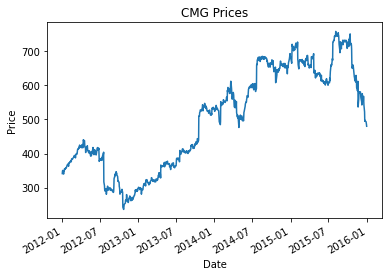

In [233]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

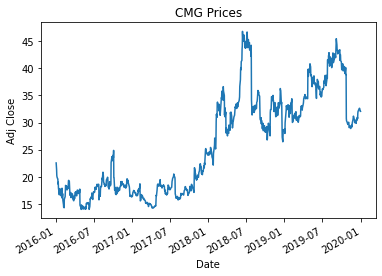

In [234]:
prices2.plot();
plt.title(symbol + " Prices")
plt.ylabel("Adj Close")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [235]:
print ("Mean: ", prices.mean())
print ("Standard deviation: ", prices.std())

Mean:  501.63665038880487
Standard deviation:  146.68873796090145


In [236]:
print ("Mean: ", prices2.mean())
print ("Standard deviation: ", prices2.std())

Mean:  25.950894661973532
Standard deviation:  9.178838866811079


In [237]:
print ("Summary Statistics")
print (prices.describe())

Summary Statistics
count    1006.000000
mean      501.636650
std       146.688738
min       236.240005
25%       371.555000
50%       521.270020
75%       646.834991
max       757.770020
Name: CMG, dtype: float64


In [238]:
print ("Summary Statistics")
print (prices2.describe())

Summary Statistics
count    1006.000000
mean       25.950895
std         9.178839
min        14.010000
25%        17.590000
50%        24.240000
75%        32.952499
max        46.759998
Name: TWTR, dtype: float64


We can easily modify `Series` with scalars using our basic mathematical operators.

In [239]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

Date
2012-01-03    672.539978
2012-01-04    687.500000
2012-01-05    690.960022
2012-01-06    687.900024
2012-01-09    669.479980
Name: CMG, dtype: float64

In [240]:
modp = prices2 * 2 - 10
modp.head(5)

Date
2016-01-04    35.119999
2016-01-05    33.840000
2016-01-06    32.779999
2016-01-07    30.520000
2016-01-08    29.959999
Name: TWTR, dtype: float64

And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [241]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

Date
2012-01-03    401.448991
2012-01-04    368.495559
2012-01-05    360.861959
2012-01-06    379.207341
2012-01-09    318.472178
dtype: float64

In [242]:
nop = prices2 + 5 * pd.Series(np.random.normal(0, 5, len(prices2)), index=prices2.index) + 18
nop.head(5)

Date
2016-01-04    45.755579
2016-01-05    14.477048
2016-01-06    80.192814
2016-01-07    46.947761
2016-01-08    62.412947
dtype: float64

If there are no matching indices, however, we may get an empty `Series` in return.

In [243]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-03 00:00:00   NaN
2012-01-04 00:00:00   NaN
2012-01-05 00:00:00   NaN
2012-01-06 00:00:00   NaN
2012-01-09 00:00:00   NaN
dtype: float64

In [244]:
es = prices2 + pd.Series(np.random.normal(0, 1, len(prices2)))
es.head(5)

2016-01-04 00:00:00   NaN
2016-01-05 00:00:00   NaN
2016-01-06 00:00:00   NaN
2016-01-07 00:00:00   NaN
2016-01-08 00:00:00   NaN
dtype: float64

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [245]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

In [246]:
ar = prices2.diff()[1:]
mr = prices2.pct_change()[1:]

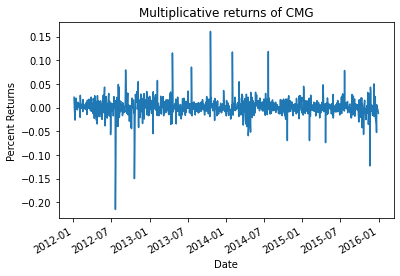

In [247]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

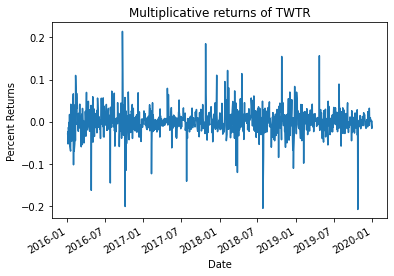

In [248]:
plt.title("Multiplicative returns of " + symbol2)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mr.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [249]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.name = "30-day rolling mean"

In [250]:
rm = prices2.rolling(29).mean()
rm.name = "29-day rolling mean"

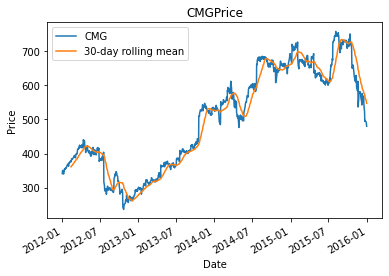

In [251]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

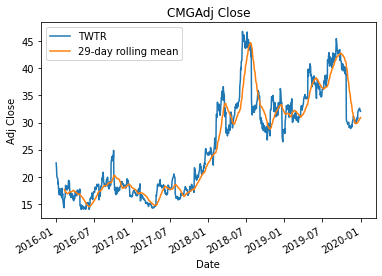

In [252]:
prices2.plot()
rm.plot()
plt.title(symbol + "Adj Close")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.legend();

In [253]:
rolling_std = prices.rolling(30).mean()
rolling_std.name = "30-day rolling volatility"

In [254]:
rstd = prices2.rolling(29).mean()
rstd.name = "29-day rolling volatility"

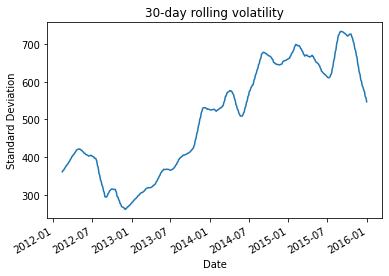

In [255]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

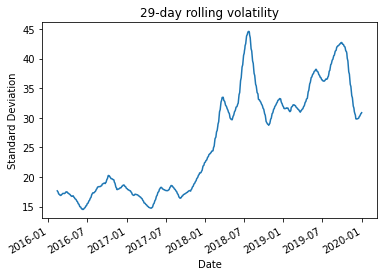

In [256]:
rstd.plot()
plt.title(rstd.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [257]:
print (np.median(mult_returns))

0.00023590204910717283


In [258]:
print (np.median(mr))

0.0011869707602896185


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [259]:
print (mult_returns.median())

0.00023590204910717283


In [260]:
print (mr.median())

0.0011869707602896185


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [261]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print (dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-0.82168586, -0.08610953, -0.03390758, -0.50448509, -0.5866963 ])}


In [262]:
dicci = {
        "A": [1, 3, 5, 7, 9],
        "B": ['R', 'T', 'J', 'Y', 'N'],
        'C' : np.random.normal(0, 1, 5)
}
print (dicci)

{'A': [1, 3, 5, 7, 9], 'B': ['R', 'T', 'J', 'Y', 'N'], 'C': array([-0.48705436, -0.00251596,  0.70089439,  1.25501235, -0.30578869])}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [263]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print (frame_data)

            a  b         c
2016-01-01  1  L -0.821686
2016-01-02  2  K -0.086110
2016-01-03  3  J -0.033908
2016-01-04  4  M -0.504485
2016-01-05  5  Z -0.586696


In [264]:
fd = pd.DataFrame(dicci, index=pd.date_range('2018-01-01', periods=5))
print (fd)

            A  B         C
2018-01-01  1  R -0.487054
2018-01-02  3  T -0.002516
2018-01-03  5  J  0.700894
2018-01-04  7  Y  1.255012
2018-01-05  9  N -0.305789


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [265]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print (numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


In [266]:
s1 = pd.Series([3, 5, 7, 9], name="Impares")
s2 = pd.Series([4, 6, 8, 10], name='Pares')
numbers2 = pd.concat([s1, s2], axis=1)
print (numbers2)

   Impares  Pares
0        3      4
1        5      6
2        7      8
3        9     10


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [267]:
print (numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


In [268]:
print (numbers2.columns)

Index(['Impares', 'Pares'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [269]:
numbers.columns = ['Shmevens', 'Shmodds']
print (numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


In [270]:
numbers2.columns = ['Pars', 'Impars']
print (numbers2)

   Pars  Impars
0     3       4
1     5       6
2     7       8
3     9      10


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [271]:
print (numbers.index)

RangeIndex(start=0, stop=5, step=1)


In [272]:
print (numbers2.index)

RangeIndex(start=0, stop=4, step=1)


In [273]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print (numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


In [274]:
numbers2.index = pd.date_range("2019-01-01", periods=len(numbers2))
print (numbers2)

            Pars  Impars
2019-01-01     3       4
2019-01-02     5       6
2019-01-03     7       8
2019-01-04     9      10


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [275]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

In [276]:
numbers2.values

array([[ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

This returns a NumPy array.

In [277]:
type(numbers.values)

numpy.ndarray

In [278]:
type(numbers2.values)

numpy.ndarray

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [279]:
symbol = ["CMG", "MCD", "SHAK", "FB"]
start = "2012-01-01"
end = "2016-01-01"
pric = pdr.get_data_yahoo(symbol, start, end)
prices = pric['Adj Close']
if isinstance(symbol, list):
    prices.columns = map(lambda x: x, prices.columns)
else:
    prices.name = symbol

In [280]:
symbol2 = ["GOOG", "TWTR", "NOK", "MSFT"]
start2 = "2018-01-01"
end2 = "2020-01-01"
pr2 = pdr.get_data_yahoo(symbol2, start2, end2)
prices2 = pr2['Adj Close']
if isinstance(symbol2, list):
    prices2.columns = map(lambda x: x, prices2.columns)
else:
    prices2.name = symbol2

Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [281]:
prices.CMG.head()

Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: CMG, dtype: float64

In [282]:
prices2.GOOG.head()

Date
2018-01-02    1065.000000
2018-01-03    1082.479980
2018-01-04    1086.400024
2018-01-05    1102.229980
2018-01-08    1106.939941
Name: GOOG, dtype: float64

We can also use `loc[]` to access an individual column like so.

In [283]:
prices.loc[:, 'CMG'].head()

Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: CMG, dtype: float64

In [284]:
prices2.loc[:, 'TWTR'].head()

Date
2018-01-02    24.510000
2018-01-03    24.450001
2018-01-04    23.990000
2018-01-05    24.320000
2018-01-08    24.590000
Name: TWTR, dtype: float64

Accessing an individual column will return a `Series`, regardless of how we get it.

In [285]:
print (type(prices.CMG))
print (type(prices.loc[:, 'CMG']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [286]:
print (type(prices2.GOOG))
print (type(prices2.loc[:, 'GOOG']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [287]:
prices.loc[:, ['CMG', 'MCD']].head()

,CMG,MCD
Date,,
2012-01-03,341.269989,75.681129
2012-01-04,348.750000,76.102287
2012-01-05,350.480011,76.439156
2012-01-06,348.950012,77.028755
2012-01-09,339.739990,76.293686


In [288]:
prices2.loc[:, ['GOOG', 'TWTR']].head()

,GOOG,TWTR
Date,,
2018-01-02,1065.000000,24.510000
2018-01-03,1082.479980,24.450001
2018-01-04,1086.400024,23.990000
2018-01-05,1102.229980,24.320000
2018-01-08,1106.939941,24.590000


We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [289]:
prices.loc['2015-12-15':'2015-12-22']

,CMG,MCD,SHAK,FB
Date,,,,
2015-12-15,554.859985,102.119232,41.580002,104.550003
2015-12-16,567.830017,102.913971,40.169998,106.790001
2015-12-17,554.890015,102.617004,38.540001,106.220001
2015-12-18,541.080017,101.883415,39.750000,104.040001
2015-12-21,522.010010,102.782944,38.189999,104.769997
2015-12-22,494.609985,102.809143,39.750000,105.510002


In [290]:
prices2.loc["2019-01-01" : "2019-06-01"]

,GOOG,TWTR,NOK,MSFT
Date,,,,
2019-01-02,1045.849976,28.809999,5.621394,98.375481
2019-01-03,1016.059998,27.990000,5.454907,94.756454
2019-01-04,1070.709961,29.950001,5.807468,99.163513
2019-01-07,1068.390015,31.340000,5.895608,99.289970
2019-01-08,1076.280029,31.799999,6.022922,100.009888
...,...,...,...,...
2019-05-24,1133.469971,37.410000,5.069874,123.794762
2019-05-28,1134.150024,37.290001,4.960951,123.716324
2019-05-29,1116.459961,36.849998,4.990657,122.519951


This plays nicely with lists of columns, too.

In [291]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

,CMG,MCD
Date,,
2015-12-15,554.859985,102.119232
2015-12-16,567.830017,102.913971
2015-12-17,554.890015,102.617004
2015-12-18,541.080017,101.883415
2015-12-21,522.010010,102.782944
2015-12-22,494.609985,102.809143


In [292]:
prices2.loc["2018-01-01" : "2019-01-01", ['NOK', 'MSFT']]

,NOK,MSFT
Date,,
2018-01-02,4.477365,82.194328
2018-01-03,4.543208,82.576843
2018-01-04,4.599646,83.303658
2018-01-05,4.627864,84.336464
2018-01-08,4.590240,84.422516
...,...,...
2018-12-24,5.376560,91.575211
2018-12-26,5.445114,97.830696
2018-12-27,5.513667,98.433876


Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [293]:
prices.iloc[0:2, 1]

Date
2012-01-03    75.681129
2012-01-04    76.102287
Name: MCD, dtype: float64

In [294]:
prices2.iloc[0:4, 3]

Date
2018-01-02    82.194328
2018-01-03    82.576843
2018-01-04    83.303658
2018-01-05    84.336464
Name: MSFT, dtype: float64

In [295]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 3]].head(20)

,CMG,FB
Date,,
2012-01-04,348.750000,NaN
2012-01-06,348.950012,NaN
2012-01-10,341.119995,NaN
2012-01-12,347.619995,NaN
2012-01-17,353.380005,NaN
2012-01-19,358.089996,NaN
2012-01-23,360.459991,NaN
2012-01-25,363.140015,NaN
2012-01-27,366.760010,NaN


In [296]:
prices2.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 3]].head(20)

,GOOG,MSFT
Date,,
2018-01-03,1082.479980,82.576843
2018-01-05,1102.229980,84.336464
2018-01-09,1106.260010,84.365158
2018-01-11,1105.520020,84.231262
2018-01-16,1121.760010,84.489456
2018-01-18,1129.790039,86.163002
2018-01-22,1155.810059,87.607018
2018-01-24,1164.239990,87.807838
2018-01-26,1175.839966,89.949959


#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [297]:
prices.loc[prices.CMG > prices.MCD].head()

,CMG,MCD,SHAK,FB
Date,,,,
2012-01-03,341.269989,75.681129,NaN,NaN
2012-01-04,348.750000,76.102287,NaN,NaN
2012-01-05,350.480011,76.439156,NaN,NaN
2012-01-06,348.950012,77.028755,NaN,NaN
2012-01-09,339.739990,76.293686,NaN,NaN


In [298]:
prices2.loc[prices2.GOOG > prices2.NOK].head()

,GOOG,TWTR,NOK,MSFT
Date,,,,
2018-01-02,1065.000000,24.510000,4.477365,82.194328
2018-01-03,1082.479980,24.450001,4.543208,82.576843
2018-01-04,1086.400024,23.990000,4.599646,83.303658
2018-01-05,1102.229980,24.320000,4.627864,84.336464
2018-01-08,1106.939941,24.590000,4.590240,84.422516


We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [299]:
prices.loc[(prices.CMG > prices.MCD) & ~prices.SHAK.isnull()].head()

,CMG,MCD,SHAK,FB
Date,,,,
2015-01-30,709.840027,78.041306,45.900002,75.910004
2015-02-02,712.549988,78.100372,43.990002,74.989998
2015-02-03,726.630005,79.290771,44.980000,75.400002
2015-02-04,676.000000,79.400520,41.320000,75.629997
2015-02-05,670.909973,79.645317,42.639999,75.610001


In [300]:
prices2.loc[(prices2.GOOG> prices2.NOK) & ~prices2.MSFT.isnull()].head()

,GOOG,TWTR,NOK,MSFT
Date,,,,
2018-01-02,1065.000000,24.510000,4.477365,82.194328
2018-01-03,1082.479980,24.450001,4.543208,82.576843
2018-01-04,1086.400024,23.990000,4.599646,83.303658
2018-01-05,1102.229980,24.320000,4.627864,84.336464
2018-01-08,1106.939941,24.590000,4.590240,84.422516


#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [301]:
s_1 = pdr.get_data_yahoo('TSLA', start, end)['Adj Close']
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,CMG,MCD,SHAK,FB,TSLA
Date,,,,,
2012-01-03,341.269989,75.681129,NaN,NaN,5.616
2012-01-04,348.750000,76.102287,NaN,NaN,5.542
2012-01-05,350.480011,76.439156,NaN,NaN,5.424
2012-01-06,348.950012,77.028755,NaN,NaN,5.382
2012-01-09,339.739990,76.293686,NaN,NaN,5.450


In [302]:
s_2 = pdr.get_data_yahoo('TSLA', start2, end2)['Adj Close']
prices2.loc[:, 'TSLA'] = s_2
prices2.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,GOOG,TWTR,NOK,MSFT,TSLA
Date,,,,,
2018-01-02,1065.000000,24.510000,4.477365,82.194328,64.106003
2018-01-03,1082.479980,24.450001,4.543208,82.576843,63.450001
2018-01-04,1086.400024,23.990000,4.599646,83.303658,62.924000
2018-01-05,1102.229980,24.320000,4.627864,84.336464,63.316002
2018-01-08,1106.939941,24.590000,4.590240,84.422516,67.281998


It is also just as easy to remove a column.

In [303]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

,CMG,MCD,SHAK,FB
Date,,,,
2012-01-03,341.269989,75.681129,NaN,NaN
2012-01-04,348.750000,76.102287,NaN,NaN
2012-01-05,350.480011,76.439156,NaN,NaN
2012-01-06,348.950012,77.028755,NaN,NaN
2012-01-09,339.739990,76.293686,NaN,NaN


In [304]:
prices2 = prices2.drop('TSLA', axis=1)
prices2.head(5)

,GOOG,TWTR,NOK,MSFT
Date,,,,
2018-01-02,1065.000000,24.510000,4.477365,82.194328
2018-01-03,1082.479980,24.450001,4.543208,82.576843
2018-01-04,1086.400024,23.990000,4.599646,83.303658
2018-01-05,1102.229980,24.320000,4.627864,84.336464
2018-01-08,1106.939941,24.590000,4.590240,84.422516


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [305]:
df_1 = pdr.get_data_yahoo(['SPY', 'GE'], start, end)
df1 = df_1['Adj Close']
df_2 = pdr.get_data_yahoo(['MSFT', 'AAPL', 'GOOG'], start, end)
df2 = df_2['Adj Close']
df_3 = pd.concat([df1, df2], axis=1)
df_3.head()

Symbols,SPY,GE,MSFT,AAPL,GOOG
Date,,,,,
2012-01-03,106.331924,13.900859,21.799267,12.650659,331.462585
2012-01-04,106.498711,14.052279,22.312283,12.718646,332.892242
2012-01-05,106.782272,14.044711,22.540291,12.859850,328.274536
2012-01-06,106.507057,14.120420,22.890448,12.994284,323.796326
2012-01-09,106.765602,14.279417,22.589146,12.973674,310.067780


In [306]:
df_4 = pdr.get_data_yahoo(['NOK', 'MSFT'], start, end)
df4 = df_1['Adj Close']
df_5 = pdr.get_data_yahoo(['FB', 'TWTR', 'GOOG'], start, end)
df5 = df_2['Adj Close']
df_6 = pd.concat([df1, df2], axis=1)
df_6.head()

Symbols,SPY,GE,MSFT,AAPL,GOOG
Date,,,,,
2012-01-03,106.331924,13.900859,21.799267,12.650659,331.462585
2012-01-04,106.498711,14.052279,22.312283,12.718646,332.892242
2012-01-05,106.782272,14.044711,22.540291,12.859850,328.274536
2012-01-06,106.507057,14.120420,22.890448,12.994284,323.796326
2012-01-09,106.765602,14.279417,22.589146,12.973674,310.067780


#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [307]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,CMG,MCD,SHAK,FB
Date,,,,
2012-01-03,341.269989,75.681129,0.0,0.0
2012-01-04,348.750000,76.102287,0.0,0.0
2012-01-05,350.480011,76.439156,0.0,0.0
2012-01-06,348.950012,77.028755,0.0,0.0
2012-01-09,339.739990,76.293686,0.0,0.0


In [308]:
fp = prices2.fillna(0)
fp.head(5)

,GOOG,TWTR,NOK,MSFT
Date,,,,
2018-01-02,1065.000000,24.510000,4.477365,82.194328
2018-01-03,1082.479980,24.450001,4.543208,82.576843
2018-01-04,1086.400024,23.990000,4.599646,83.303658
2018-01-05,1102.229980,24.320000,4.627864,84.336464
2018-01-08,1106.939941,24.590000,4.590240,84.422516


In [309]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,CMG,MCD,SHAK,FB
Date,,,,
2012-01-03,341.269989,75.681129,45.900002,38.23
2012-01-04,348.750000,76.102287,45.900002,38.23
2012-01-05,350.480011,76.439156,45.900002,38.23
2012-01-06,348.950012,77.028755,45.900002,38.23
2012-01-09,339.739990,76.293686,45.900002,38.23


In [310]:
bp = prices2.fillna(method='bfill')
bp.head(5)

,GOOG,TWTR,NOK,MSFT
Date,,,,
2018-01-02,1065.000000,24.510000,4.477365,82.194328
2018-01-03,1082.479980,24.450001,4.543208,82.576843
2018-01-04,1086.400024,23.990000,4.599646,83.303658
2018-01-05,1102.229980,24.320000,4.627864,84.336464
2018-01-08,1106.939941,24.590000,4.590240,84.422516


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [311]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,CMG,MCD,SHAK,FB
Date,,,,
2015-01-30,709.840027,78.041306,45.900002,75.910004
2015-02-02,712.549988,78.100372,43.990002,74.989998
2015-02-03,726.630005,79.290771,44.980000,75.400002
2015-02-04,676.000000,79.400520,41.320000,75.629997
2015-02-05,670.909973,79.645317,42.639999,75.610001


In [312]:
dp= prices2.dropna()
dp.head(5)

,GOOG,TWTR,NOK,MSFT
Date,,,,
2018-01-02,1065.000000,24.510000,4.477365,82.194328
2018-01-03,1082.479980,24.450001,4.543208,82.576843
2018-01-04,1086.400024,23.990000,4.599646,83.303658
2018-01-05,1102.229980,24.320000,4.627864,84.336464
2018-01-08,1106.939941,24.590000,4.590240,84.422516


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

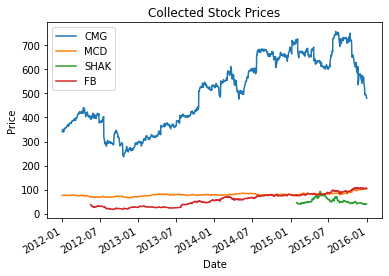

In [313]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

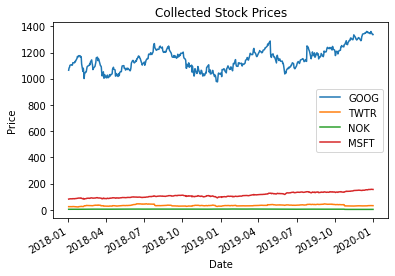

In [314]:
prices2.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [315]:
prices.mean(axis=0)

CMG     501.636650
MCD      78.979400
SHAK     53.575708
FB       57.589956
dtype: float64

In [316]:
prices2.mean(axis=0)

GOOG    1150.883815
TWTR      34.204732
NOK        5.232434
MSFT     112.728259
dtype: float64

As well as the standard deviation:

In [317]:
prices.std(axis=0)

CMG     146.688738
MCD       6.699071
SHAK     11.968587
FB       26.509646
dtype: float64

In [318]:
prices2.std(axis=0)

GOOG    83.754500
TWTR     5.248897
NOK      0.665036
MSFT    19.435322
dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [319]:
prices.describe()

,CMG,MCD,SHAK,FB
count,1006.000000,1006.000000,233.000000,911.000000
mean,501.636650,78.979400,53.575708,57.589956
std,146.688738,6.699071,11.968587,26.509646
min,236.240005,65.829971,38.189999,17.730000
25%,371.555000,75.829334,44.119999,28.245000
50%,521.270020,78.654839,49.270000,60.490002
75%,646.834991,82.062105,61.669998,78.435001
max,757.770020,104.861481,92.860001,109.010002


In [320]:
prices2.describe()

,GOOG,TWTR,NOK,MSFT
count,503.000000,503.000000,503.000000,503.000000
mean,1150.883815,34.204732,5.232434,112.728259
std,83.754500,5.248897,0.665036,19.435322
min,976.219971,22.160000,3.350000,81.295418
25%,1085.169983,30.520000,5.010462,97.712738
50%,1146.209961,32.959999,5.356973,106.895081
75%,1205.015015,37.680000,5.689948,132.600822
max,1361.170044,46.759998,6.463624,156.932251


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [321]:
(2 * prices - 50).head(5)

,CMG,MCD,SHAK,FB
Date,,,,
2012-01-03,632.539978,101.362259,NaN,NaN
2012-01-04,647.500000,102.204575,NaN,NaN
2012-01-05,650.960022,102.878311,NaN,NaN
2012-01-06,647.900024,104.057510,NaN,NaN
2012-01-09,629.479980,102.587372,NaN,NaN


In [322]:
(4 * prices2 - 33).head(6)

,GOOG,TWTR,NOK,MSFT
Date,,,,
2018-01-02,4227.000000,65.040001,-15.090542,295.777313
2018-01-03,4296.919922,64.800003,-14.827168,297.307373
2018-01-04,4312.600098,62.959999,-14.601418,300.214630
2018-01-05,4375.919922,64.279999,-14.488543,304.345856
2018-01-08,4394.759766,65.360001,-14.639042,304.690063
2018-01-09,4392.040039,63.680000,-14.563791,304.460632


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [323]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,CMG,MCD,SHAK,FB
Date,,,,
2012-01-04,0.021918,0.005565,NaN,NaN
2012-01-05,0.004961,0.004427,NaN,NaN
2012-01-06,-0.004365,0.007713,NaN,NaN
2012-01-09,-0.026394,-0.009543,NaN,NaN
2012-01-10,0.004062,0.000602,NaN,NaN


In [324]:
mr = prices2.pct_change()[2:]
mr.head()

,GOOG,TWTR,NOK,MSFT
Date,,,,
2018-01-04,0.003621,-0.018814,0.012422,0.008802
2018-01-05,0.014571,0.013756,0.006135,0.012398
2018-01-08,0.004273,0.011102,-0.008130,0.001020
2018-01-09,-0.000614,-0.017080,0.004098,-0.000679
2018-01-10,-0.003299,0.003310,-0.010204,-0.004534


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

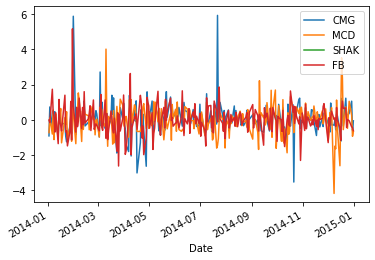

In [325]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

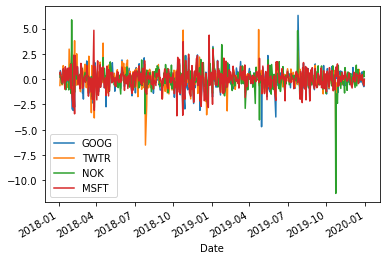

In [326]:
nr = (mr - mr.mean(axis=0))/mr.std(axis=0)
nr.loc["2018-01-01" : "2020-01-01"].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [327]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.columns = prices.columns

In [328]:
rm = prices2.rolling(30).mean()
rm.columns = prices2.columns

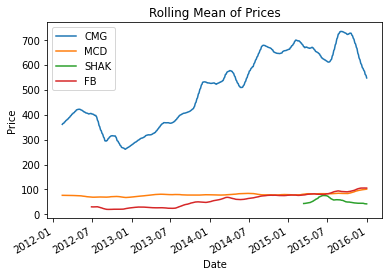

In [329]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

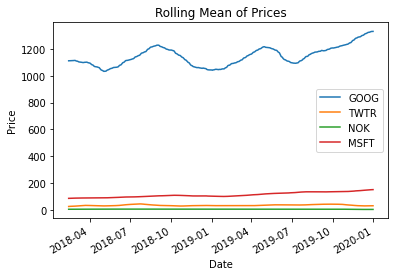

In [330]:
rm.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*